##[Problem 1] Understanding the content of the competition

1. What kind of company is Home Credit?
   Home Credit is a non-bank financial institution that provide a
   positive and safe borrowing experience for the underserved population
2. What is expected in this competition?
   This competition aims to build a predictive model using
   statistical and machine learning methods to determine which
   clients are capable of repayment
3. What are the benefits companies can gain by predicting this?
   The benefits are :
   - Offer loans to  more clients who have insufficient or non-existent credit histories
   - Reduce the tax of recjection
   - Reduce financial losses due to unpaid loans.



In [2]:
import pandas as pd
df=pd.read_csv('application_train.csv');
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Head     SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0       

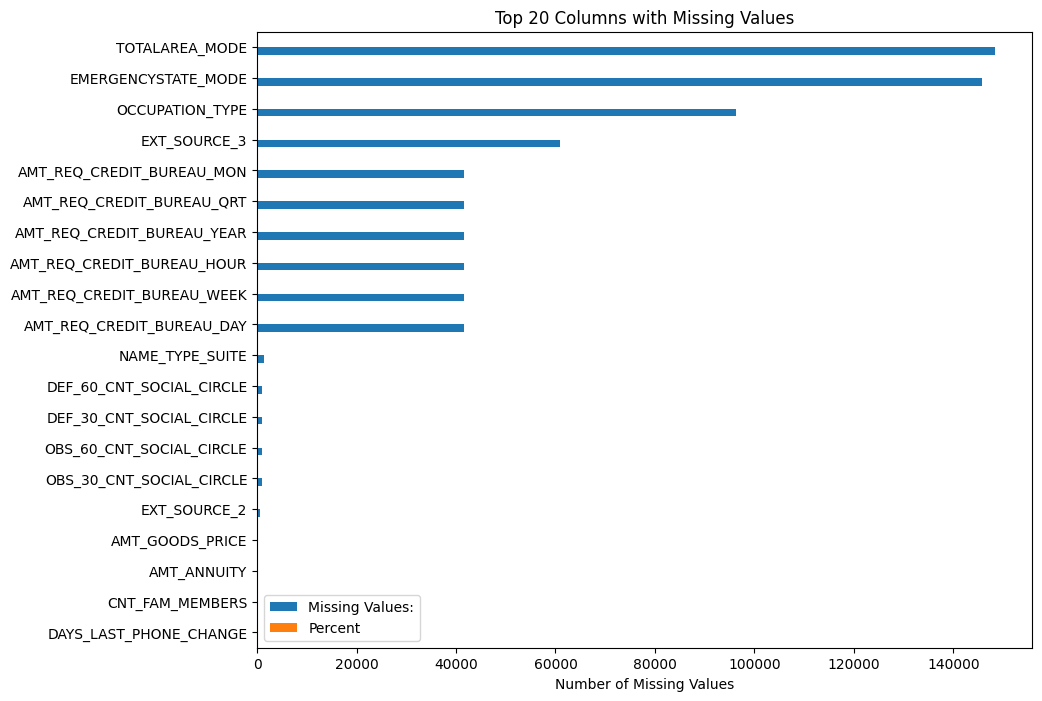

In [13]:
#[Problem 2] Understanding the overview of data
import matplotlib.pyplot as plt
print('Head ',df.head())
print('info ',df.info())
print('describe ',df.describe())

miss_values=df.isnull().sum()
miss_values=miss_values[miss_values>0].sort_values(ascending=True)
miss_percen=(miss_values/len(df))*100
missing_df=pd.DataFrame({'Missing Values:':miss_values,'Percent':miss_percen})
missing_df
missing_df.head(20).plot(kind='barh', figsize=(10, 8), title='Top 20 Columns with Missing Values')
plt.show()

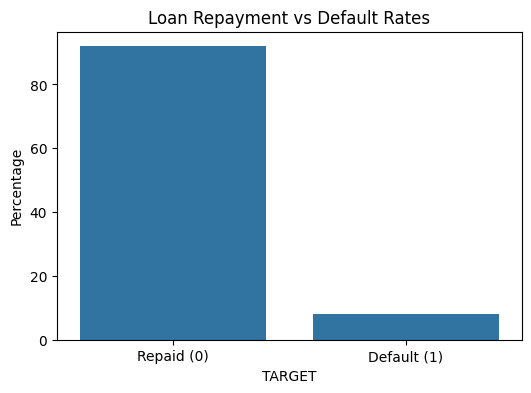

In [16]:
import seaborn as sns
target_counts = df['TARGET'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.xticks([0, 1], ['Repaid (0)', 'Default (1)'])
plt.ylabel('Percentage')
plt.title('Loan Repayment vs Default Rates')
plt.show()